# Quantum teleportation ⚛
We are going to transfer information from Alice to Bob, particularly Alice will send to Bob a qubit of information using only 2 classical bit.

## Roadmap 🚀
- #### Getting ready 🔧
    - initialize the state to be teleported on quibt **q_0->C**
    - create entanglement between Alice (**q_1->A**) and Bob's (**q_2->B**) quibits
- #### Algorithm ⚙
    - apply a *CNOT* gate to **A**-**C** (**A** controlled by **C**)
    - apply an *H* gate to **C**
    - perform a measure of **C** and **A** in two classical bits (**C->c_0**, **A->c_1**)
    - apply a gate *V* depending on the outcomes of the previous measure to **B** (V=Z^(c_0)X^(c_1))
- #### Check the result 🍻
    - visualize **B**

## Getting ready 🔧

In [4]:
###imports 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit import QuantumRegister, ClassicalRegister
import numpy as np

$$\vert \psi\rangle=\vert C\rangle=\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$
$$\vert \psi_{Bell}\rangle=\vert A\rangle\otimes\vert B\rangle=\frac{1}{\sqrt{2}}(\vert00\rangle + \vert11\rangle)$$

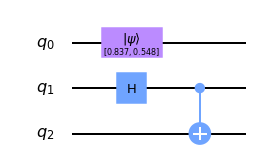

In [17]:
initCircuit = QuantumCircuit(3)
initCircuit.initialize([np.sqrt(0.7), np.sqrt(0.3)], 0)
initCircuit.h(1)
initCircuit.cx(1, 2)
initCircuit.draw('mpl')

In [26]:
sv = Statevector.from_label('000')
psi_0 = sv.evolve(initCircuit)

## Algorithm ⚙

In [28]:
qubits_Alice = QuantumRegister(2) # C,A
qubit_Bob    = QuantumRegister(1) # B
c_0  = ClassicalRegister(1)       
c_1  = ClassicalRegister(1)
c_2  = ClassicalRegister(1)

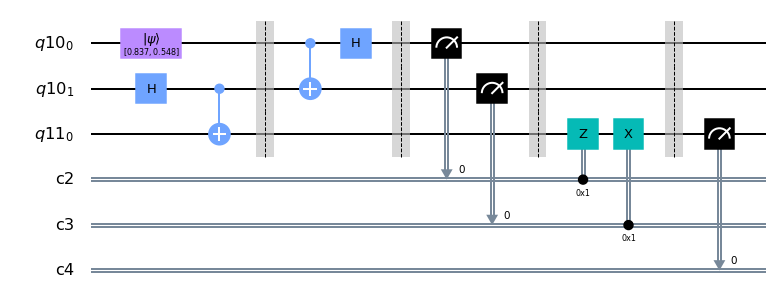

In [32]:
teleportCircuit = QuantumCircuit(qubits_Alice, qubit_Bob, c_0, c_1, c_2)
### initialize
teleportCircuit.initialize([np.sqrt(0.7), np.sqrt(0.3)], 0)
teleportCircuit.h(1)
teleportCircuit.cx(1, 2)
teleportCircuit.barrier()

### telepotation
teleportCircuit.cx(0,1)
teleportCircuit.h(0)
teleportCircuit.barrier()
teleportCircuit.measure(qubits_Alice[0], c_0)
teleportCircuit.measure(qubits_Alice[1], c_1)
teleportCircuit.barrier()
teleportCircuit.z(2).c_if(c_0, 1)
teleportCircuit.x(2).c_if(c_1, 1)
teleportCircuit.barrier()

### reading the result
teleportCircuit.measure(qubit_Bob, c_2)
teleportCircuit.draw('mpl')

## Check the result 🍻

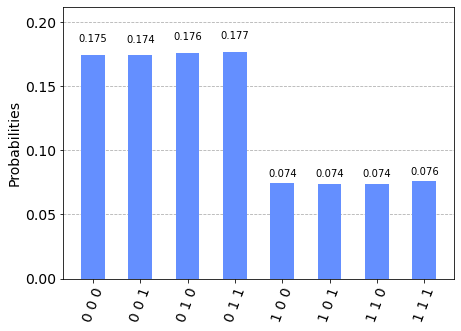

In [34]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
result = execute(teleportCircuit, simulator, shots=100000).result()
counts = result.get_counts(teleportCircuit)
plot_histogram(counts)

In [55]:
total = counts['0 0 0']+counts['0 1 0']+counts['0 1 1']+counts['1 0 0']+counts['1 1 0']+counts['1 1 1']
alpha = np.sqrt((counts['0 0 0']+counts['0 1 0']+counts['0 1 1'])/total)
beta  = np.sqrt((counts['1 0 0']+counts['1 1 0']+counts['1 1 1'])/total) 

In [73]:
from IPython.display import Markdown as md

md("$$\\vert B\\rangle=%.4f\\vert0\\rangle + %.4f \\vert 1 \\rangle \\simeq \\vert \\psi \\rangle$$"%(alpha,beta))

$$\vert B\rangle=0.8377\vert0\rangle + 0.5461 \vert 1 \rangle \simeq \vert \psi \rangle$$